In [16]:
import numpy as np
import matplotlib.pyplot as plt
import asciitable as a
%matplotlib inline

In [200]:
def plot(fname):
    def isnum(a):
        try:
            return float(a)
        except:
            None

    with open(fname, 'r') as file:
        data = file.read()
    vals_temp="      ".join(data.split("\n")[1:]).split("    ")
    vals=list(filter(None.__ne__, [isnum(i) for i in vals_temp]))
    stuff=list(filter(None.__ne__, [isnum(i) for i in data.split("\n")[0].split(" ")]))
    e_min=stuff[0]*13.6056980659 
    e_max=stuff[1]*13.6056980659 
    num=int(stuff[2])
    num_ch=int(stuff[3])
    spin=int(stuff[4])
    ef=stuff[5]*13.6056980659 
    chan=np.reshape(vals,(int(num_ch*spin),int(num)))
    x=np.linspace(e_min,e_max,num)
    fig,ax=plt.subplots(figsize=(15,4))
    for i in range(num_ch*spin):
        plt.plot(x,chan[i],label="channel "+str(i),alpha=.7,linestyle=":")#|,s=5)
    plt.plot(x,(chan[0]+chan[1]+chan[2])/3,label="avg ",alpha=1)#|,s=5)
    plt.axvline(ef,c="black",linestyle=":",label="Ef")
    plt.title(fname)
    plt.xlim([0,ef+3])
    plt.legend()
    opt={"energy (eV)":x,"x":chan[0],"y":chan[1],"z":chan[2]}
    data_opt=pd.DataFrame.from_dict(opt)
    data_opt.to_csv(fname+".csv", sep=',')
    plt.show()

## OK

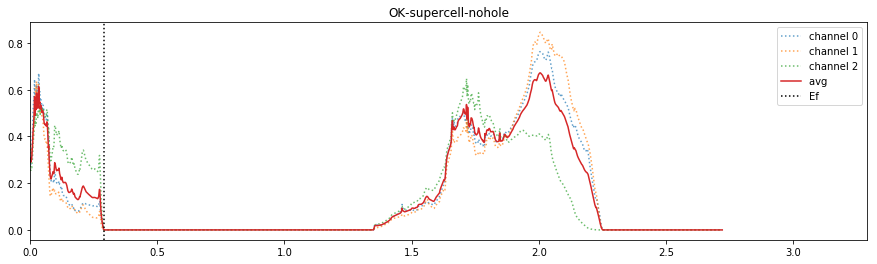

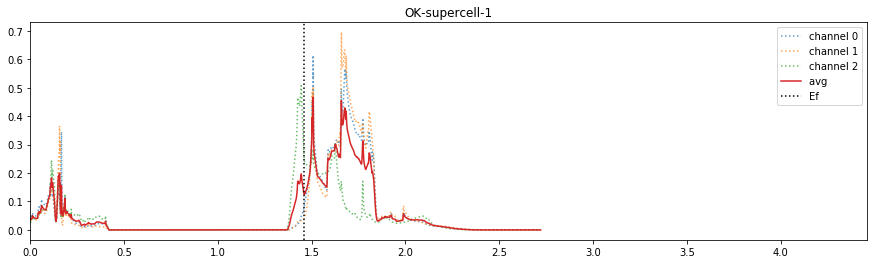

In [201]:
plot("OK-supercell-nohole")
plot("OK-supercell-1")
# plot("OK-supercell-.5")
# plot("OK-supercell-.1")
# plot("OK-supercell-.05")
# plot("OK-supercell-0.04")
# plot("OK-supercell-0.025")
# plot("OK-supercell-0.01")
# plot("OK-supercell-0")

## CoL

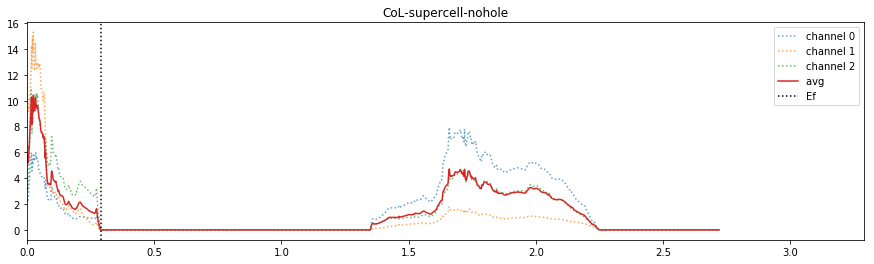

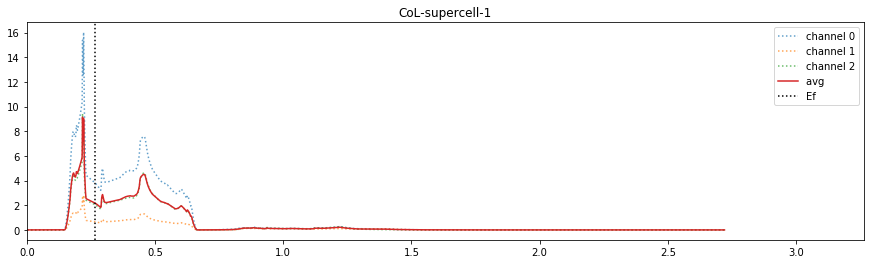

In [202]:
plot("CoL-supercell-nohole")
plot("CoL-supercell-1")

## DOS QSGW

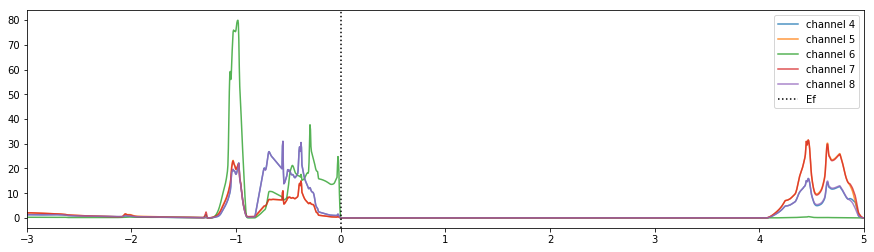

In [195]:
def isnum(a):
    try:
        return float(a)
    except:
        None

with open("dos.temp", 'r') as file:
    data = file.read()
vals_temp="      ".join(data.split("\n")[1:]).split("    ")
vals=list(filter(None.__ne__, [isnum(i) for i in vals_temp]))
stuff=list(filter(None.__ne__, [isnum(i) for i in data.split("\n")[0].split(" ")]))
e_min=stuff[0]*13.6056980659 
e_max=stuff[1]*13.6056980659 
num=int(stuff[2])
num_ch=int(stuff[3])
spin=int(stuff[4])
ef=stuff[5]*13.6056980659 
chan=np.reshape(vals,(int(num_ch*spin),int(num)))
x=np.linspace(e_min,e_max,num)-ef
ef=0
fig,ax=plt.subplots(figsize=(15,4))
for i in range(4,9):#range(num_ch*spin):
    plt.plot(x,chan[i],label="channel "+str(i),alpha=.8)#|,s=5)
#plt.plot(x,(chan[0]+chan[1]+chan[2])/3,label="avg ",alpha=1)#|,s=5)
plt.axvline(ef,c="black",linestyle=":",label="Ef")
#plt.title(fname)
plt.xlim([-3,5])
plt.legend()

plt.show()

In [190]:
qsgw={
"Energy (eV)":x,
"Co-s": chan[0],
"Co-py":chan[1],
"Co-pz":chan[2],
"Co-px":chan[3],
"Co-xy":chan[4],
"Co-yz":chan[5],
"Co-z2":chan[6],
"Co-xz":chan[7],
"Co-x2-y2":chan[8],
"Li-s": chan[9],
"Li-py":chan[10],
"Li-pz":chan[11],
"Li-px":chan[12],
"Li-xy":chan[13],
"Li-yz":chan[14],
"Li-z2":chan[15],
"Li-xz":chan[16],
"Li-x2-y2":chan[17],
      
"O1-s": chan[18],
"O1-py":chan[19],
"O1-pz":chan[20],
"O1-px":chan[21],
"O1-xy":chan[22],
"O1-yz":chan[23],
"O1-z2":chan[24],
"O1-xz":chan[25],
"O1-x2-y2":chan[26],
      
 "O2-s": chan[27],
"O2-py":chan[28],
"O2-pz":chan[29],
"O2-px":chan[30],
"O2-xy":chan[31],
"O2-yz":chan[32],
"O2-z2":chan[33],
"O2-xz":chan[34],
"O2-x2-y2":chan[35]}      


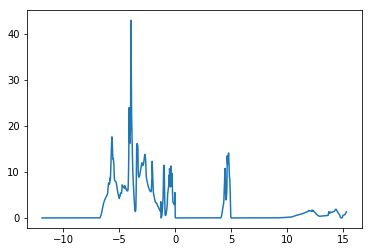

In [203]:
plt.plot(x,chan[19]+chan[20]+chan[21])